In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [133]:
data = pd.read_csv("train.csv")  # if tab-separated
print(data.head())
print(data.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float

In [134]:
print(data.isnull().sum())
print(data.columns)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='str')


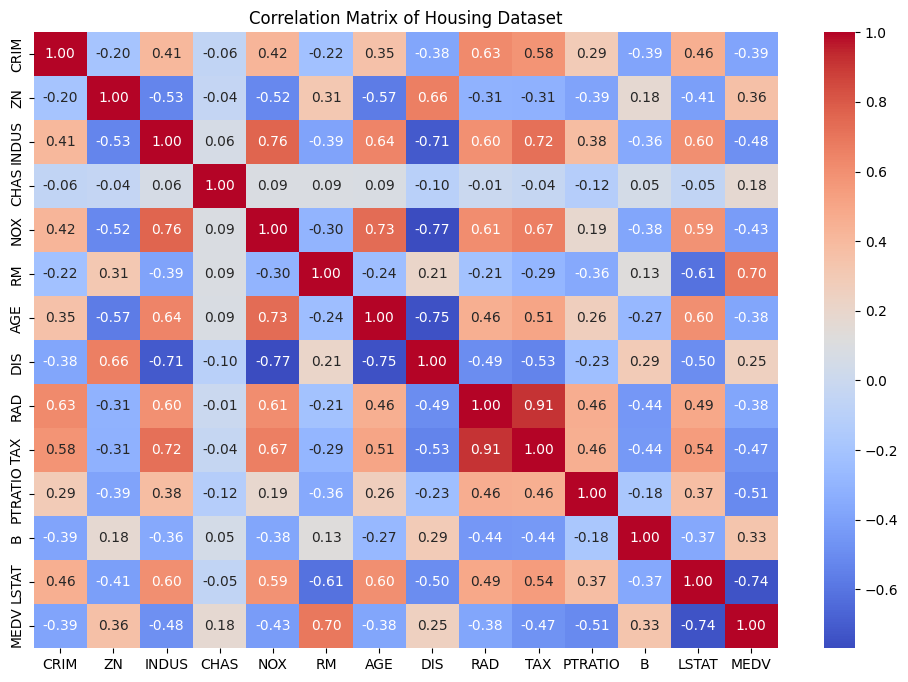

In [135]:

# Correlation matrix
corr = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Housing Dataset")
plt.show()


In [136]:
X = data.drop("MEDV", axis=1)
y = data["MEDV"]



In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [138]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [139]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [140]:


lr_pred = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = mean_squared_error(y_test, lr_pred) ** 0.5
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results")
print("MAE :", lr_mae)
print("RMSE:", lr_rmse)
print("R2  :", lr_r2)



Linear Regression Results
MAE : 3.1890919658878483
RMSE: 4.928602182665336
R2  : 0.668759493535632


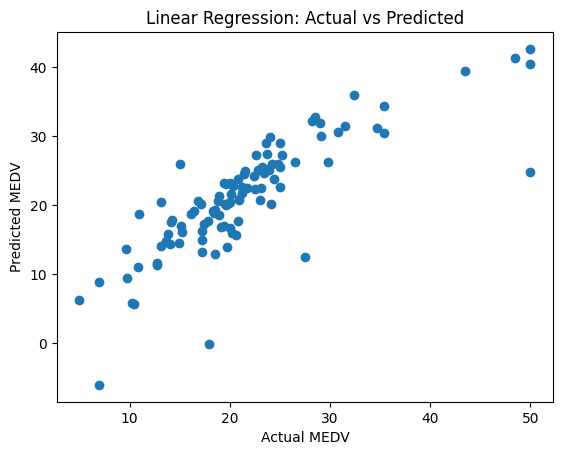

In [141]:
plt.figure()
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


In [143]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results")
print("MAE :", rf_mae)
print("RMSE:", rf_rmse)
print("R2  :", rf_r2)


Random Forest Results
MAE : 2.041078431372549
RMSE: 2.8129602438238144
R2  : 0.8920995891343227


In [144]:

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [lr_mae, rf_mae],
    "RMSE": [lr_rmse, rf_rmse],
    "R2 Score": [lr_r2, rf_r2]
})

print(results)


               Model       MAE      RMSE  R2 Score
0  Linear Regression  3.189092  4.928602  0.668759
1      Random Forest  2.041078  2.812960  0.892100


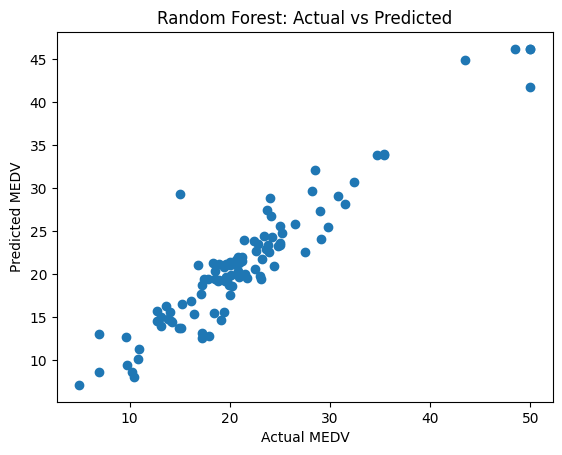

In [145]:
plt.figure()
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Random Forest: Actual vs Predicted")
plt.show()





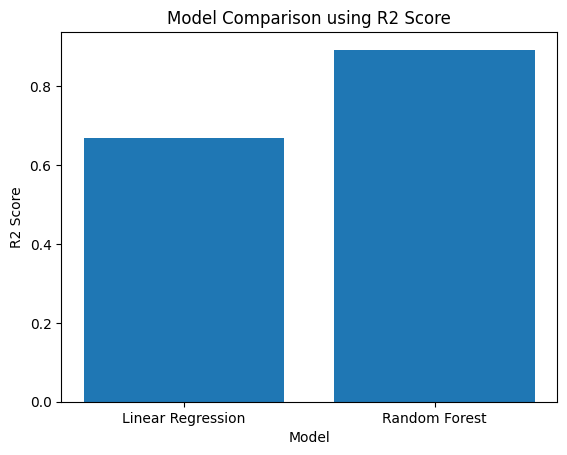

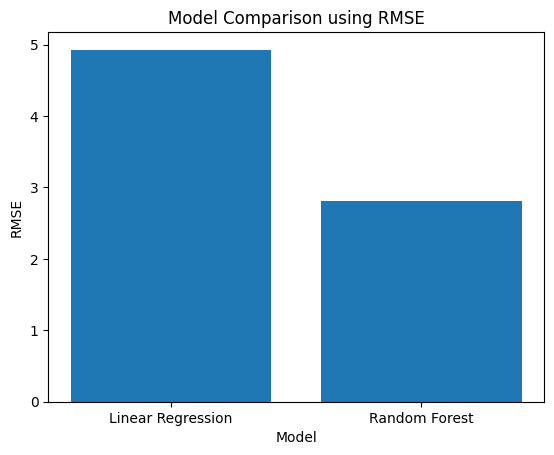

In [146]:
models = ["Linear Regression", "Random Forest"]
r2_scores = [lr_r2, rf_r2]

plt.figure()
plt.bar(models, r2_scores)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("Model Comparison using R2 Score")
plt.show()
rmse_values = [lr_rmse, rf_rmse]

plt.figure()
plt.bar(models, rmse_values)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Comparison using RMSE")
plt.show()



In [147]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_rmse = mean_squared_error(y_test, mlp_pred) ** 0.5
mlp_r2 = r2_score(y_test, mlp_pred)

print("MLP (ReLU) Results")
print("MAE :", mlp_mae)
print("RMSE:", mlp_rmse)
print("R2  :", mlp_r2)


MLP (ReLU) Results
MAE : 2.2701032972166724
RMSE: 3.5193119291385933
R2  : 0.8311070843365629


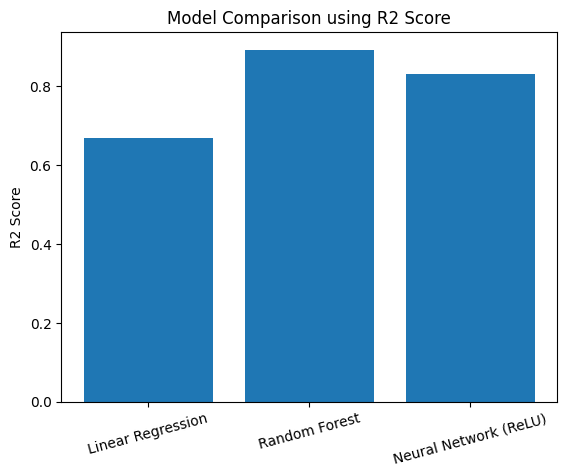

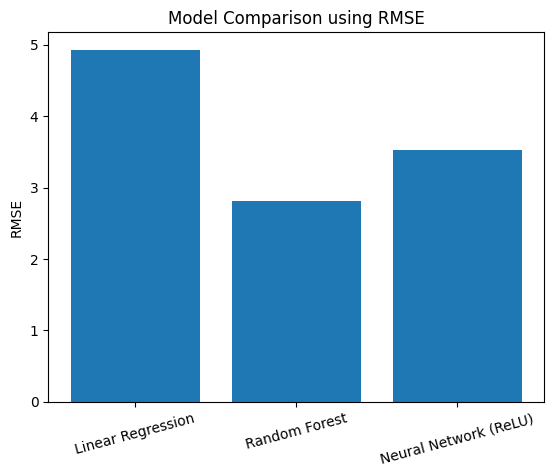

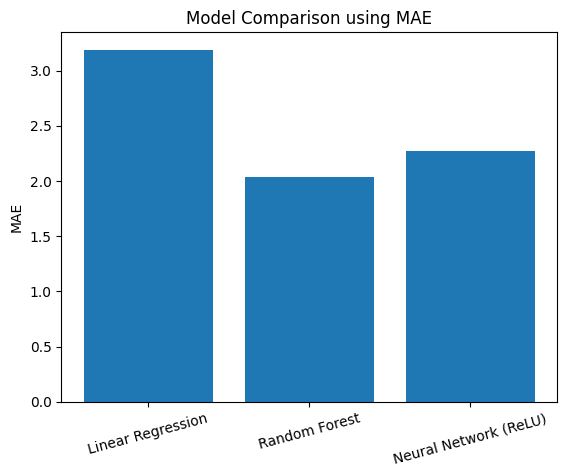

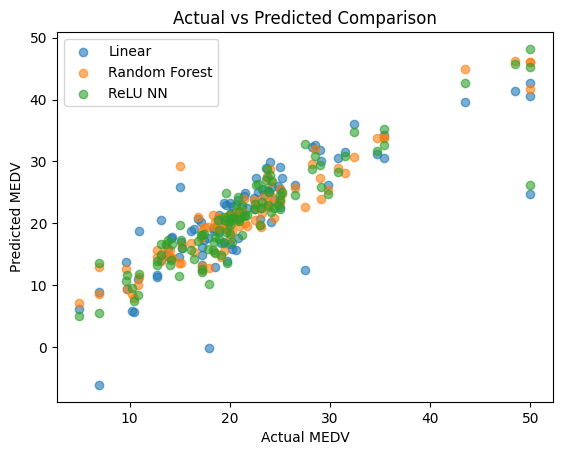

In [148]:
models = ["Linear Regression", "Random Forest", "Neural Network (ReLU)"]
r2_scores = [lr_r2, rf_r2, mlp_r2]

plt.figure()
plt.bar(models, r2_scores)
plt.ylabel("R2 Score")
plt.title("Model Comparison using R2 Score")
plt.xticks(rotation=15)
plt.show()
rmse_scores = [lr_rmse, rf_rmse, mlp_rmse]

plt.figure()
plt.bar(models, rmse_scores)
plt.ylabel("RMSE")
plt.title("Model Comparison using RMSE")
plt.xticks(rotation=15)
plt.show()
mae_scores = [lr_mae, rf_mae, mlp_mae]

plt.figure()
plt.bar(models, mae_scores)
plt.ylabel("MAE")
plt.title("Model Comparison using MAE")
plt.xticks(rotation=15)
plt.show()
plt.figure()
plt.scatter(y_test, lr_pred, label="Linear", alpha=0.6)
plt.scatter(y_test, rf_pred, label="Random Forest", alpha=0.6)
plt.scatter(y_test, mlp_pred, label="ReLU NN", alpha=0.6)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.legend()
plt.title("Actual vs Predicted Comparison")
plt.show()


